# Scope and description

The data created by this notebook is an enriched version of the [`blobs` dataset](https://spatialdata.scverse.org/en/latest/generated/spatialdata.datasets.blobs.html).

Elements contained:
- 2D single-scale image (cyx);
- 2D multi-scale image (cyx);
- 2D single-scale labels (yx);
- 2D multi-scale labels (yx);
- 2D points;
- circles;
- polygons;
- multipolygons.

Annotations contained:
- table annotating the 2D labels.

Also the following is contained:
- `Identity`, `Scale`, `Translation`, `Affine`, `Sequence` transformations (for the `blobs_labels` element. Each transformation maps to a different coordinate system.

Note, this object is not meant to contain everything, example of features that are not covered by this notebook are:
- 3D images, labels, points
- table annotating multiple elements
- multiple tables
- dataframe elements containing annotation columns (we only have elements containing spatial information)

# Prepare the data

In [1]:
import warnings

# warnings clutter the diffs of notebooks
warnings.filterwarnings("ignore")

In [2]:
NAME = "multiple_elements"

In [3]:
import spatialdata as sd
import spatialdata_plot
from io_utils import delete_old_data, write_sdata_and_check_consistency
from spatialdata.datasets import blobs

delete_old_data(name=NAME)
sdata = blobs(length=64)
sdata

SpatialData object
├── Images
│     ├── 'blobs_image': DataArray[cyx] (3, 64, 64)
│     └── 'blobs_multiscale_image': DataTree[cyx] (3, 64, 64), (3, 32, 32), (3, 16, 16)
├── Labels
│     ├── 'blobs_labels': DataArray[yx] (64, 64)
│     └── 'blobs_multiscale_labels': DataTree[yx] (64, 64), (32, 32), (16, 16)
├── Points
│     └── 'blobs_points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     ├── 'blobs_circles': GeoDataFrame shape: (5, 2) (2D shapes)
│     ├── 'blobs_multipolygons': GeoDataFrame shape: (2, 1) (2D shapes)
│     └── 'blobs_polygons': GeoDataFrame shape: (5, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (10, 3)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_image (Images), blobs_multiscale_image (Images), blobs_labels (Labels), blobs_multiscale_labels (Labels), blobs_points (Points), blobs_circles (Shapes), blobs_multipolygons (Shapes), blobs_polygons (Shapes)

In [4]:
from spatialdata.transformations import set_transformation, get_transformation, Identity, Scale, Translation, Affine, Sequence

There is already a default coordinate system, called `global`, which is mapped using the `Identity` transformation.

In [5]:
get_transformation(sdata['blobs_labels'], get_all=True)

{'global': Identity }

Let's now add a coordinate system for each other transformation.

In [6]:
scale = Scale([2, 3], axes=('x', 'y'))
translation = Translation([10, -50], axes=('x', 'y'))

transformations = {
    'global': Identity(), 
    'scale': scale,
    'translation': translation,
    'affine': Affine([
        [10, 20, 30], 
        [40, 50, 60],
        [0, 0, 1]
    ], input_axes=('x', 'y'), output_axes=('x', 'y')),
    'sequence': Sequence([scale, translation]),
}
set_transformation(sdata['blobs_labels'], transformations, set_all=True)

# Read-write and IO validation

In [7]:
import logging

logging.getLogger("ome_zarr").setLevel(logging.ERROR)

write_sdata_and_check_consistency(sdata=sdata, name=NAME)

INFO     The Zarr backing store has been changed from None the new file path: multiple_elements.zarr               


# Plot the data

## Single scale images, single scale labels, points

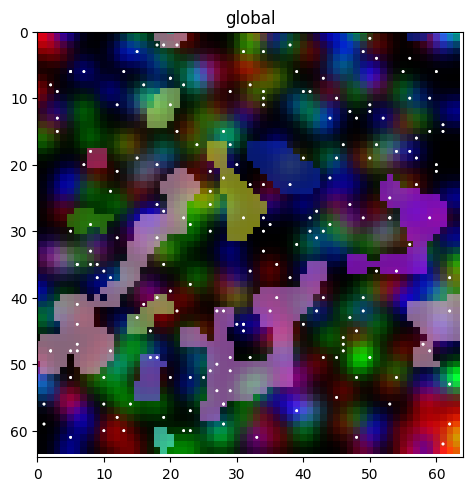

In [8]:
sdata.pl.render_images("blobs_image").pl.render_labels("blobs_labels").pl.render_points(
    "blobs_points", na_color="w"
).pl.show(coordinate_systems='global')

## Labels for each coordinate system

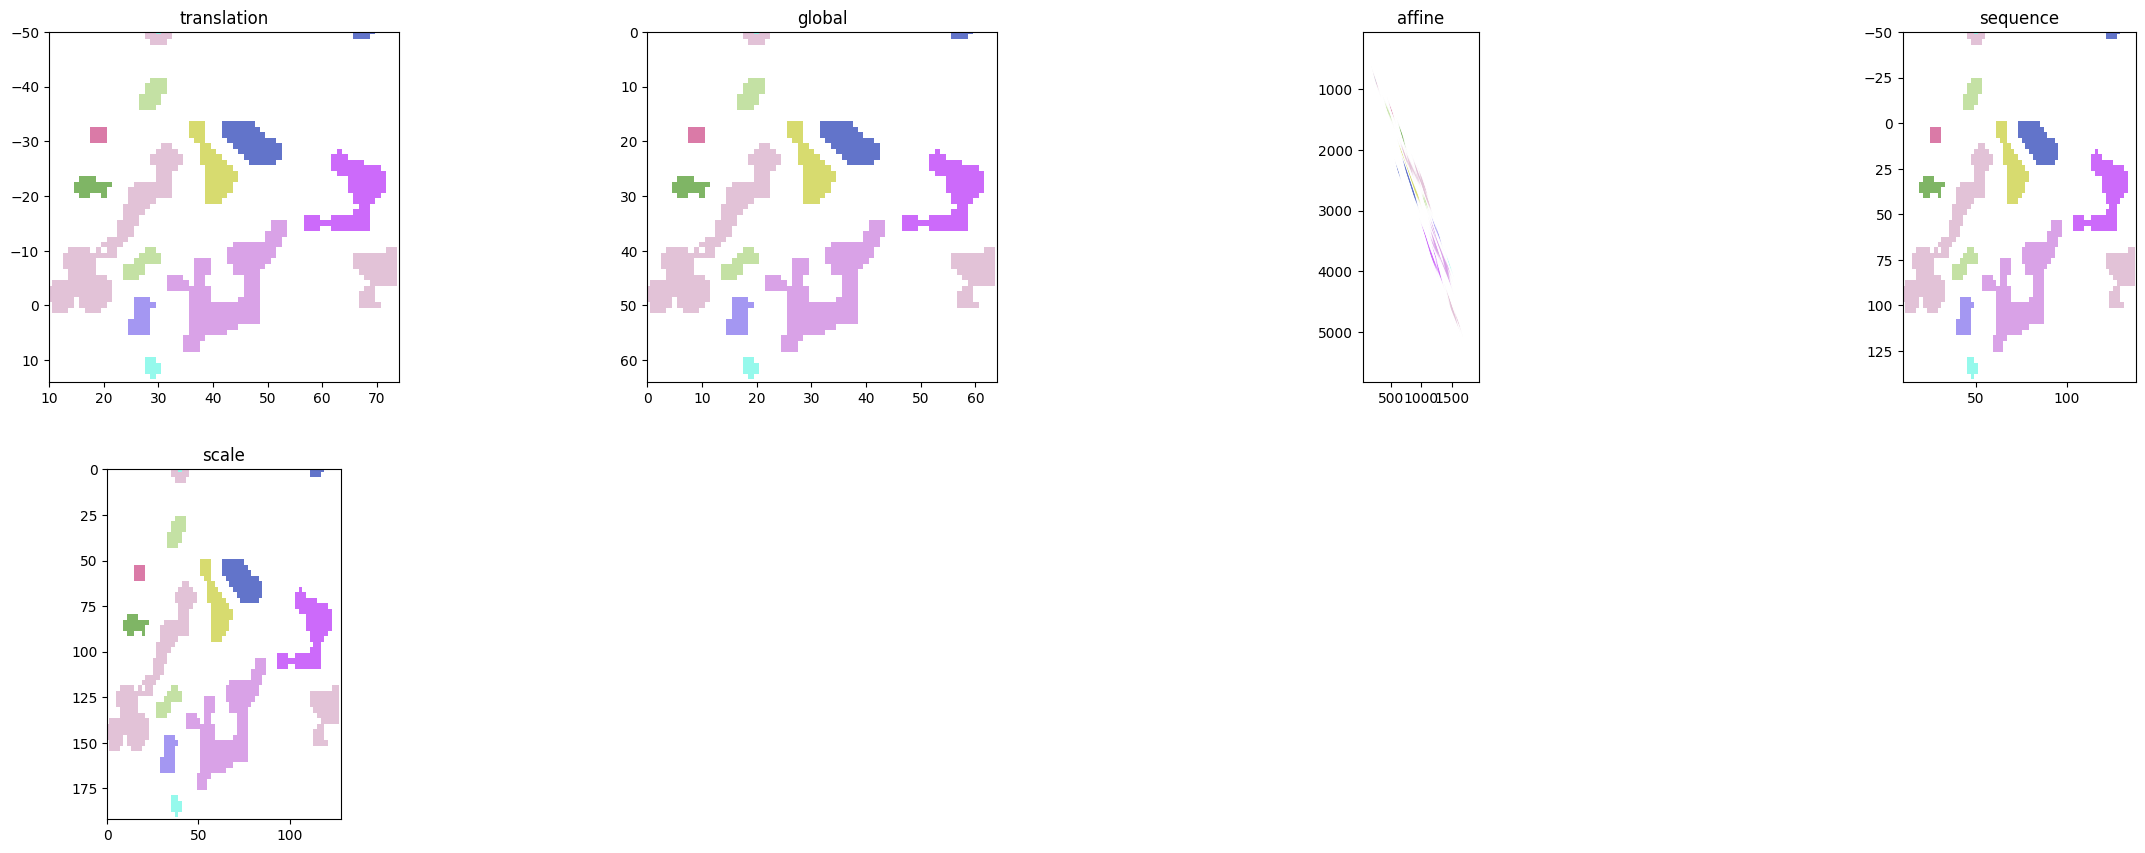

In [9]:
sdata.pl.render_labels('blobs_labels').pl.show()

## labels data plotted for each coordinate system

## Lables annoted by the table (var)

In [10]:
sdata["table"].obs

,instance_id,region
3,3,blobs_labels
4,4,blobs_labels
5,5,blobs_labels
8,8,blobs_labels
10,10,blobs_labels
11,11,blobs_labels
12,12,blobs_labels
13,13,blobs_labels
15,15,blobs_labels
16,16,blobs_labels


In [11]:
sdata["table"].var_names

Index(['channel_0_sum', 'channel_1_sum', 'channel_2_sum'], dtype='object')

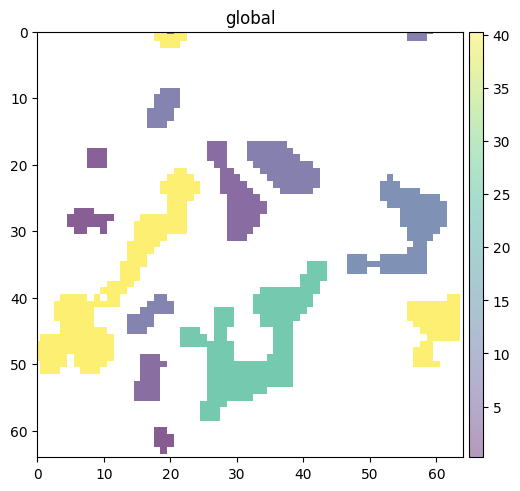

In [12]:
sdata.pl.render_labels("blobs_labels", color="channel_0_sum").pl.show(coordinate_systems='global')

## Shapes: circles, polygons, multipolygons

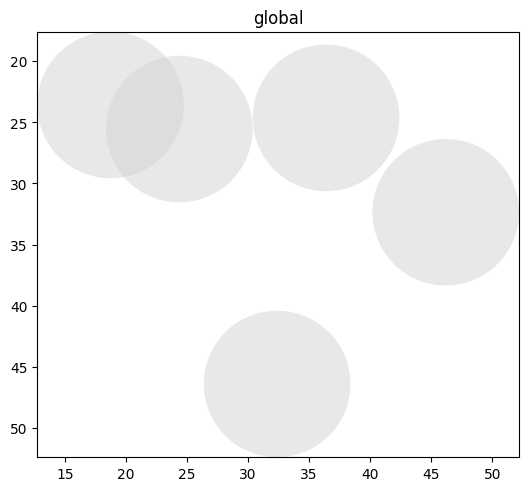

In [13]:
sdata.pl.render_shapes("blobs_circles", fill_alpha=0.5).pl.show(coordinate_systems='global')

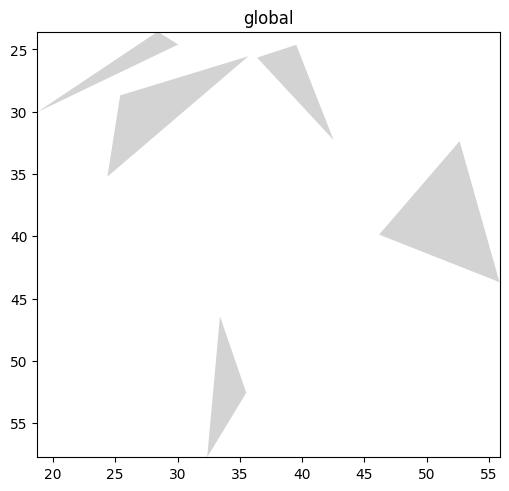

In [14]:
sdata.pl.render_shapes("blobs_polygons").pl.show(coordinate_systems='global')

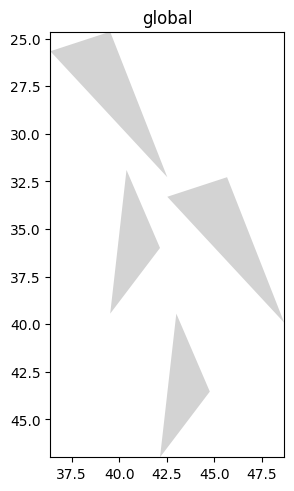

In [15]:
sdata.pl.render_shapes("blobs_multipolygons").pl.show(coordinate_systems='global')